In [4]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

## Load Data

In [23]:
#creates a dataframe from a file
df = pd.read_csv("Postures.csv")

#info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

In [24]:
df

Class  User         X0          Y0         Z0         X1          Y1  \
0          0     0   0.000000    0.000000   0.000000   0.000000    0.000000   
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...                 Z8  \
0       0.000000   0.000000    0.000000  ...                  0   
1     -72.780545  36.621229   81.680557  ...                  ?   
2     -49.596509  79.223743   43.254091  ...                  ?   
3     -50.606259  78.451526   43.567403  ...                  ?   
4     -52.752784  86.320630   68.214645  ...                  ?   
...          ...        ...         ...  ...                ...   
78091  11.099282  -1.270139  122.758679  ...  -6.54311453354464   
78092  11.069842 -30.334054   77.858214  ...  -62.1305625712145   
78093  11.020347 -22.574718  104.222208  ...   3.83590370588782   
78094 -47.271248 -30.084588   77.705861  ...  -63.2216259324485   
78095 -17.453099  -1.091566  122.827638  ...  -63.0265744155222   

                     X9                Y9                 Z9 X10 Y10 Z10 X11  \
0                     0                 0                  0   0   0   0   0   
1                     ?                 ?                  ?   ?   ?   ?   ?   
2                     ?                 ?                  ?   ?   ?   ?   ?   
3                     ?                 ?                  ?   ?   ?   ?   ?   
4                     ?                 ?                  ?   ?   ?   ?   ?   
...                 ...               ...                ...  ..  ..  ..  ..   
78091  87.7333643096221  61.2163626180662  -62.1262783028233   ?   ?   ?   ?   
78092  78.2298473919132  33.0784071753174  -45.2495433686171   ?   ?   ?   ?   
78093   78.591554010542    32.32773753847  -46.1665560916632   ?   ?   ?   ?   
78094                 ?                 ?                  ?   ?   ?   ?   ?   
78095  78.8796525666014  31.6030997578398  -47.0137357205196   ?   ?   ?   ?   

      Y11 Z11  
0       0   0  
1       ?   ?  
2       ?   ?  
3       ?   ?  
4       ?   ?  
...    ..  ..  
78091   ?   ?  
78092   ?   ?  
78093   ?   ?  
78094   ?   ?  
78095   ?   ?  

[78096 rows x 38 columns]

## Exploratory Data Analysis (EDA)


In [25]:
#check for duplicates
print(df.duplicated().sum())

#typically this next step should be in data processing but without it the EDA would be less meaningful
#replacing the ? values with Nan values 
df.replace('?', np.nan, inplace=True)#({'?': np.nan})

#convert all object columns to float
columns_list = df.columns.tolist()

#X3 column starts the type object columns
feature_until_x3 = 11
apply_conv_to_obj = len(columns_list) - feature_until_x3 

for column_obj in range (apply_conv_to_obj):
    apply = feature_until_x3 + column_obj
    
    #print (f"columns_list[apply] {columns_list[apply]}")
    df[columns_list[apply]] = df[columns_list[apply]].astype(float)



print("\n",df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      77406 non-null  float64
 12  Y3      77406 non-null  float64
 13  Z3      77406 non-null  float64
 14  X4      74976 non-null  float64
 15  Y4      74976 non-null  float64
 16  Z4      74976 non-null  float64
 17  X5      65073 non-null  float64
 18  Y5      65073 non-null  float64
 19  Z5      65073 non-null  float64
 20  X6      52248 non-null  float64
 21  Y6      52248 non-null  float64
 

In [26]:
#statistical info of the data
df.describe()

Class          User            X0            Y0            Z0  \
count  78096.000000  78096.000000  78096.000000  78096.000000  78096.000000   
mean       2.983738      7.959127     50.345664     85.812051    -29.984712   
std        1.421183      4.697810     32.696173     40.204363     34.361918   
min        0.000000      0.000000   -108.552738    -98.233756   -126.770872   
25%        2.000000      5.000000     29.295062     63.494432    -56.356438   
50%        3.000000      9.000000     54.619964     86.526246    -30.864125   
75%        4.000000     12.000000     72.488686    113.107355     -1.418803   
max        5.000000     14.000000    190.017835    169.175464    113.345119   

                 X1            Y1            Z1            X2            Y2  \
count  78096.000000  78096.000000  78096.000000  78096.000000  78096.000000   
mean      49.595209     86.192647    -29.509202     48.612121     83.771315   
std       32.478238     40.453214     34.764398     33.605390     41.023543   
min     -111.685241    -96.142589   -166.006838   -106.886524   -100.789312   
25%       28.755137     64.154529    -57.360107     25.170006     58.052385   
50%       54.215514     87.542751    -30.184005     53.814580     86.458324   
75%       71.762039    116.219398     -0.366692     71.561951    106.660827   
max      188.691997    170.209350    104.697852    188.760168    168.186466   

       ...            Z8            X9            Y9            Z9  \
count  ...  30564.000000  23968.000000  23968.000000  23968.000000   
mean   ...    -24.364044     54.746717     80.542435    -27.776883   
std    ...     35.736347     39.970672     42.676118     36.250738   
min    ...   -142.654497    -99.231688    -64.734284   -113.397327   
25%    ...    -52.521279     26.113866     44.034191    -55.618297   
50%    ...    -22.457956     61.992034     84.738571    -26.796695   
75%    ...      6.415435     83.766641    115.555248      3.064292   
max    ...    119.213101    174.054403    167.942588    123.380512   

                X10           Y10           Z10        X11         Y11  \
count  14753.000000  14753.000000  14753.000000  32.000000   32.000000   
mean      53.755031     73.998602    -29.735972 -28.769563   25.151977   
std       38.461088     42.915225     39.677816  49.754171   36.538582   
min      -80.196289    -65.019295   -112.668930 -96.951690  -65.432143   
25%       20.406693     37.697395    -62.953012 -62.608867   21.795335   
50%       61.843506     78.987241    -32.909286 -48.524085   38.748102   
75%       83.054781    100.947816      6.060066   0.645542   40.702633   
max      149.486224    168.352478    108.455548  84.683328  127.945490   

             Z11  
count  32.000000  
mean    1.644271  
std    19.655609  
min   -48.274677  
25%    -3.829163  
50%    11.205787  
75%    12.789386  
max    18.062286  

[8 rows x 38 columns]

### Histograms


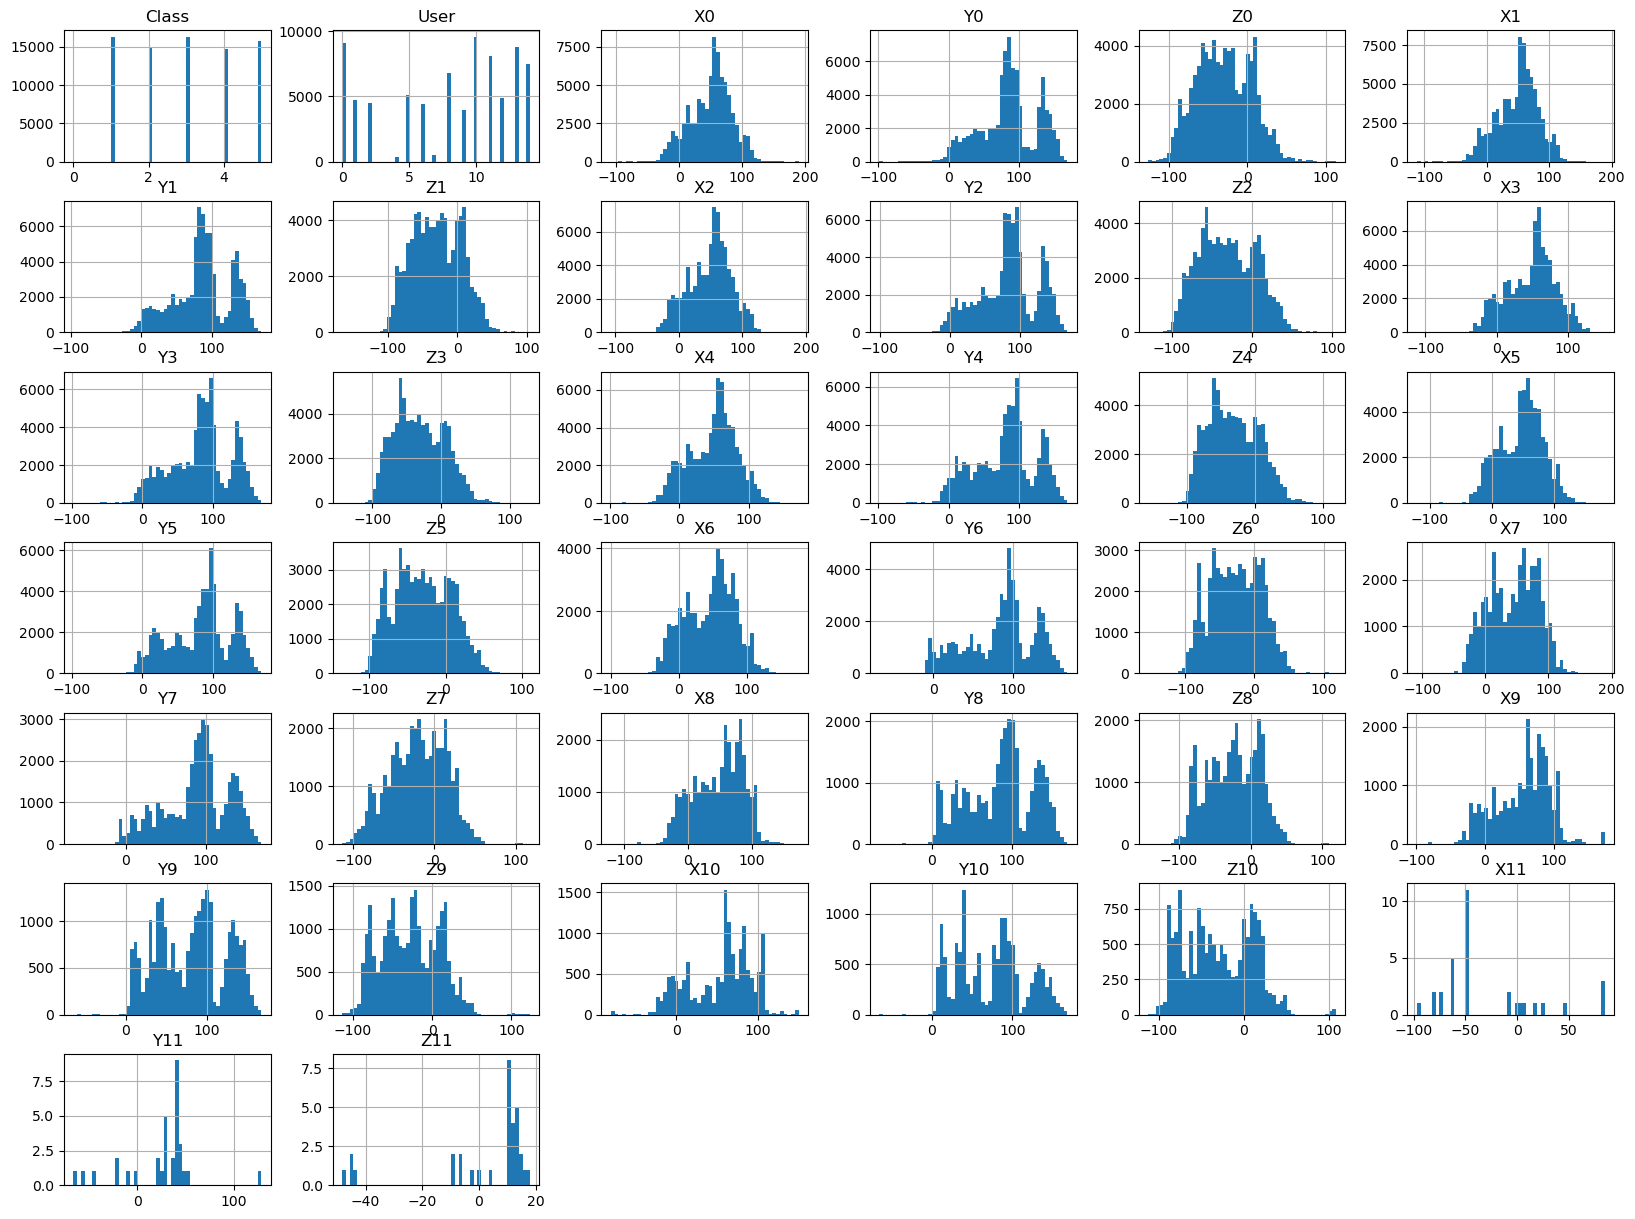

In [27]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [29]:
#histogram of user

hist, bin_edges = np.histogram(df['User'], bins=50)
plt.figure(figsize=(5,5))
plt.hist(df['User'], bins=50)
plt.title('Histogram of User Feature')
plt.show()

### Check for Outliers
Identify outliers and anomalies in the data.

df.columns.tolist() ['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11']
column_1 2 column_2 3 column_3 4
column_1 5 column_2 6 column_3 7
column_1 8 column_2 9 column_3 10
column_1 11 column_2 12 column_3 13
column_1 14 column_2 15 column_3 16
column_1 17 column_2 18 column_3 19
column_1 20 column_2 21 column_3 22
column_1 23 column_2 24 column_3 25
column_1 26 column_2 27 column_3 28
column_1 29 column_2 30 column_3 31
column_1 32 column_2 33 column_3 34
column_1 35 column_2 36 column_3 37


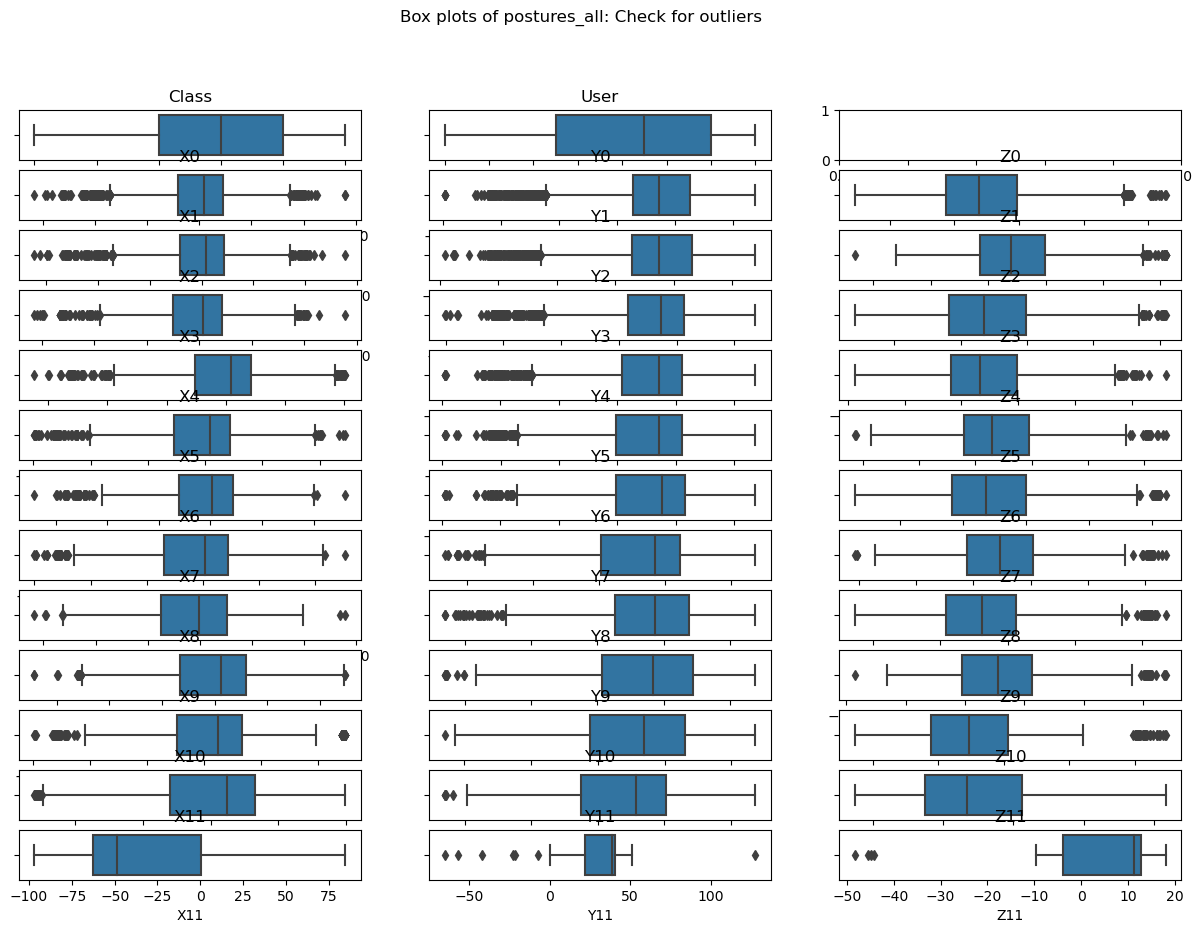

In [11]:
# Check for outliers

# Create a grid of subplots
# 3 columns and 13 rows to represent the 38 columns of the dataset, but 1 subplot stays empty
fig, axs = plt.subplots(ncols=3, nrows=13, figsize=(15, 10))

columns_list = df.columns.tolist()
print (f"df.columns.tolist() {columns_list }")

# Set titles
axs[0, 0].set_title(columns_list[0])
axs[0, 1].set_title(columns_list[1])

for line in range (12): # apply  to the 0-11
    line_plus_1 = line + 1
    
    axs[line_plus_1, 0].set_title(columns_list[2+line*3])
    axs[line_plus_1, 1].set_title(columns_list[3+line*3])
    axs[line_plus_1, 2].set_title(columns_list[4+line*3])

sns.boxplot(x=df[columns_list[0]], ax=axs[0, 0])
sns.boxplot(x=df[columns_list[1]], ax=axs[0, 1])


for line in range (12): # apply  to the 0-11
    line_plus_1 = line + 1
    
    column_1 = 2+line*3
    column_2 = 3+line*3
    column_3 = 4+line*3
    print (f"column_1 {column_1} column_2 {column_2} column_3 {column_3}")
    sns.boxplot(x=df[columns_list[column_1]], ax=axs[line_plus_1, 0])
    sns.boxplot(x=df[columns_list[column_2]], ax=axs[line_plus_1, 1])
    sns.boxplot(x=df[columns_list[column_3]], ax=axs[line_plus_1, 2])

    # Add a title to the entire figure
fig.suptitle('Box plots of postures_all: Check for outliers')
plt.show()

### Looking for correlations


Correlations Matrix

Class    1.000000
Y9       0.232697
Y10      0.172631
Y3       0.169636
Y2       0.169296
Y8       0.167774
Y4       0.167576
Y1       0.144135
Y11      0.125613
Y5       0.119431
Z2       0.095512
Z1       0.089894
Y0       0.081808
Z3       0.081754
X0       0.080209
Y7       0.062988
Y6       0.062274
X10      0.053492
Z0       0.051832
Z4       0.050872
Z11      0.015265
X1      -0.010528
Z5      -0.027608
User    -0.030667
Z10     -0.048124
X6      -0.051873
X2      -0.052351
X5      -0.052454
X4      -0.055786
X3      -0.056136
Z9      -0.075456
X9      -0.086346
X11     -0.105516
X7      -0.106753
X8      -0.119278
Z8      -0.119760
Z6      -0.157359
Z7      -0.248780
Name: Class, dtype: float64


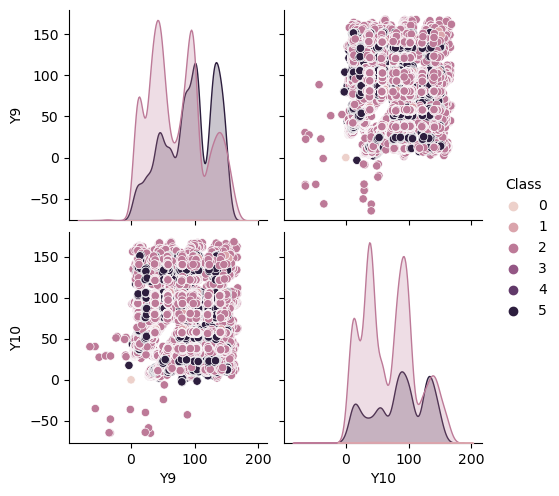

In [12]:
#creates a matrix of correlations
corr_matrix = df.corr() 
#how much each attribute correlates with the Class target variable value, the lower the value the least relevant the feature is
print("\nCorrelations Matrix\n")
print(corr_matrix['Class'].sort_values(ascending=False))#to present all columns their type cannot be object so we must convert it to float

#plot to present the correlation between the 2 most correlated features with target variable
sns.pairplot(df, vars=['Y9', 'Y10'], hue='Class')


## Data processing


In [13]:
#eliminating the first row of the dataset
df = df.iloc[1:]

print(df)



       Class  User         X0          Y0         Z0         X1          Y1  \
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
5          1     0  55.142401   71.435607 -64.177303  36.175818   81.556874   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...       

In [14]:
#eliminating the last 3 columns because they have more than 99,9% of Nan values
df = df.iloc[:, :-3]

print(df)

#create dummies to change the variable user from numeric to categorical, adding a column for each user
df = pd.concat([df,pd.get_dummies(df['User'], prefix= 'user')], axis = 1)
print(df)

#eliminating the original numerical User column
df = df.drop(columns=["User"])

print(df.info())



       Class  User         X0          Y0         Z0         X1          Y1  \
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
5          1     0  55.142401   71.435607 -64.177303  36.175818   81.556874   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...       

### Train Test Split


In [15]:
#defining the X and y for the train test split
X = df.iloc[:, 1:]#all columns starting from index 1 onward
y = df.iloc[:, 0]#first column of the dataset "Class" target variable column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

X_train.info()
print("\n")
y_train.info()
print("\n")
X_test.info()
print("\n")
y_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58571 entries, 59111 to 15726
Data columns (total 47 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X0       58571 non-null  float64
 1   Y0       58571 non-null  float64
 2   Z0       58571 non-null  float64
 3   X1       58571 non-null  float64
 4   Y1       58571 non-null  float64
 5   Z1       58571 non-null  float64
 6   X2       58571 non-null  float64
 7   Y2       58571 non-null  float64
 8   Z2       58571 non-null  float64
 9   X3       58042 non-null  float64
 10  Y3       58042 non-null  float64
 11  Z3       58042 non-null  float64
 12  X4       56226 non-null  float64
 13  Y4       56226 non-null  float64
 14  Z4       56226 non-null  float64
 15  X5       48842 non-null  float64
 16  Y5       48842 non-null  float64
 17  Z5       48842 non-null  float64
 18  X6       39210 non-null  float64
 19  Y6       39210 non-null  float64
 20  Z6       39210 non-null  float64
 21  X7      

### Scaling, Imputation and Classification models

#### Auxiliar functions

In [19]:
# Execute list of scalers, imputers,models and present the results 
def test_models (scalers, imputers,models, X_train, y_train, X_test,y_test, verbose):
    results =[]
    ct = 0
    for name_scaler, scaler in scalers:
        for name_imputer, imputer in imputers:
            for name_mod, model in models:
                #scaling
                scaler.fit(X_train)
                Xt_train = scaler.transform(X_train)
                Xt_test  = scaler.transform(X_test)

                #imputing
                imputer.fit(Xt_train)
                Xt_train = imputer.transform(Xt_train)
                Xt_test  = imputer.transform(Xt_test)


                model.fit(Xt_train, y_train)
                preds = model.predict(Xt_test) #PREDICTION

                #present model number
                if verbose:
                    ct += 1
                    print("\nModel %d" % ct)

                #save results
                results = save_results (name_scaler, scaler, name_imputer, imputer, name_mod, model, results,y_test, preds, verbose)
    
    results_sorted = sorted(results, key=lambda x: x[8], reverse=True) #f1 sorted decreasing
    display_results(results_sorted)
    return results



# Save the model scores and present intermediate results (w/ verbose)
# Returns the list with the saved results 
def save_results(name_scaler, scaler,name_imputer, imputer, name_mod, model, results, y_test, preds, verbose):

    # Calculate the precision, recall, f1 and mcc scores
    #the target variable Class has 5 different values so we need to do a weighted average for the precision, recall and f1 scores
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    mcc = matthews_corrcoef(y_test, preds)
    
    if verbose:
        print(f"Scaler: {scaler} imputer: {imputer} classifier: {name_mod} {model}")
        print("The Precision is: %7.4f" % precision)
        print("The Recall is: %7.4f" % recall)
        print("The F1 score is: %7.4f" % f1)
        print("The Matthews correlation coefficient is: %7.4f" % mcc)
        print()
        print("This is the Confusion Matrix")
        print(pd.DataFrame(confusion_matrix(y_test, preds)))


    results.append((name_scaler,
                    scaler,
                    name_imputer, 
                    imputer, 
                    name_mod, 
                    model,
                    precision,
                    recall,
                    f1,
                    mcc,                    
                    ))
    return results

# Display the model final results. Receives the ordered results to present
def display_results (results):        
    
    noshow = ""
    print (f"\n--------------------------Results for Classification Models Performance--------------------------")
    for res in results:
        name_scaler = res [0]
        scaler = res [1]
        name_imputer = res [2]
        imputer = res [3]
        name_mod = res [4]
        model = res [5]
        precision = res [6]
        recall = res [7]
        f1 = res [8]
        mcc = res [9]

        print(f"{name_mod.ljust(25)} | precision     {precision:.4f} | recall     {recall:.4f} | f1     {f1:.4f}| mcc     {mcc:.4f}")
        print(f"{noshow.ljust(25)} | scaler {scaler} | imputer {imputer}")  

    

In [21]:
# Defining a list of scalers
scalers = [
    ('PowerTransformer', PowerTransformer()),
    ('MinMaxScaler', MinMaxScaler()),
    ('StandardScaler', StandardScaler())
]

# Defining a list of Imputers
imputers = [
    ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('KNNImputer', KNNImputer(n_neighbors=3))
]

# Defining a list of classification models
classification_models = [
    ('LogisticRegression', LogisticRegression(C = 0.01)),
    ('LogisticRegression', LogisticRegression(C = 1)),
    ('DecisionTree_maxd10', DecisionTreeClassifier(max_depth = 10)),
    ('DecisionTree_maxd20', DecisionTreeClassifier(max_depth = 20)),
    ('DecisionTree_minsl20', DecisionTreeClassifier(min_samples_leaf = 5)),
    ('DecisionTree_minsl10', DecisionTreeClassifier(min_samples_leaf = 10)),
    ('DecisionTree_critgini', DecisionTreeClassifier(criterion = 'gini')),
    ('DecisionTree_critentropy', DecisionTreeClassifier(criterion = 'entropy')),
    ('GaussianNB', GaussianNB()),
    ('KNN_K3_balltree', KNeighborsClassifier(n_neighbors = 3, algorithm = 'ball_tree')),
    ('KNN_K3_kdtree', KNeighborsClassifier(n_neighbors = 3, algorithm = 'kd_tree')),
    ('KNN_K5_balltree', KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree')), 
    ('KNN_K5_kdtree', KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree')),
    ('KNN_K5_balltree_wdist', KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree',weights = 'distance')), 
    ('KNN_K5_kdtree_wdist', KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree',weights = 'distance'))
]


results_classification = []
VERBOSE = False # True to present/print the progress of the model performance

results_classification =  test_models (scalers, imputers, classification_models, X_train, y_train, X_test,y_test, VERBOSE)



c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



--------------------------Results for Classification Models Performance--------------------------
DecisionTree_critentropy  | precision     0.9678 | recall     0.9678 | f1     0.9678| mcc     0.9597
                          | scaler PowerTransformer() | imputer SimpleImputer(strategy='median')
DecisionTree_critentropy  | precision     0.9675 | recall     0.9675 | f1     0.9675| mcc     0.9593
                          | scaler MinMaxScaler() | imputer SimpleImputer(strategy='median')
DecisionTree_critgini     | precision     0.9673 | recall     0.9673 | f1     0.9673| mcc     0.9591
                          | scaler StandardScaler() | imputer SimpleImputer()
DecisionTree_critentropy  | precision     0.9668 | recall     0.9668 | f1     0.9668| mcc     0.9584
                          | scaler StandardScaler() | imputer SimpleImputer(strategy='median')
DecisionTree_maxd20       | precision     0.9666 | recall     0.9666 | f1     0.9666| mcc     0.9582
                          | scale